✈️ Week 4: Delay Analysis – Airline and Weather

🎯 Week 4 Objectives

Compare delay causes by airline (carrier delay, weather delay, NAS delay, etc.)

Explore total and average delays by carrier and airport

Identify peak delay times and top delay-prone routes

Visualize relationships and summarize insights

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

# Load optimized processed dataset
df = pd.read_parquet("processed/delayedflights_2008_processed.parquet")

# Basic overview
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (1936758, 44)
Columns: ['unnamed:_0', 'year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout', 'cancelled', 'cancellationcode', 'diverted', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay', 'any_delay_reason', 'fl_date', 'dep_time_str', 'arr_time_str', 'dep_datetime', 'arr_datetime', 'day_of_week', 'dep_hour', 'route', 'is_delayed', 'total_delay_minutes', 'dep_delayed', 'scheduled_duration_min', 'actual_duration_min']


,unnamed:_0,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,...,dep_datetime,arr_datetime,day_of_week,dep_hour,route,is_delayed,total_delay_minutes,dep_delayed,scheduled_duration_min,actual_duration_min
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,2008-01-03 20:03:00,2008-01-03 22:11:00,Thursday,20,IAD-TPA,0,0.0,0,128.0,128.0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,2008-01-03 07:54:00,2008-01-03 10:02:00,Thursday,7,IAD-TPA,0,0.0,1,128.0,128.0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,2008-01-03 06:28:00,2008-01-03 08:04:00,Thursday,6,IND-BWI,0,0.0,0,96.0,96.0
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,2008-01-03 18:29:00,2008-01-03 19:59:00,Thursday,18,IND-BWI,1,2.0,1,90.0,90.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,2008-01-03 19:40:00,2008-01-03 21:21:00,Thursday,19,IND-JAX,0,0.0,1,101.0,101.0


In [5]:
delay_cols = [
    'carrierdelay', 'weatherdelay', 'nasdelay',
    'securitydelay', 'lateaircraftdelay', 'arrdelay'
]

df[delay_cols].describe()

,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,arrdelay
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.936758e+06
mean,1.235367e+01,2.385512e+00,9.675611e+00,5.805836e-02,2.529647e+01,4.212108e+01
std,3.613493e+01,1.734036e+01,2.808958e+01,1.623934e+00,4.205486e+01,5.667423e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.090000e+02
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,2.400000e+01
75%,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,3.300000e+01,5.500000e+01
max,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,2.461000e+03


In [8]:
carrier_delay_summary = (
    df.groupby('uniquecarrier')[delay_cols]
    .sum()
    .sort_values('arrdelay', ascending=False)
    .reset_index()
)

carrier_delay_summary.head(10)


C:\Users\HP\AppData\Local\Temp\ipykernel_24980\1922341547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('uniquecarrier')[delay_cols]


,uniquecarrier,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,arrdelay
0,WN,2261002.0,510665.0,1308052.0,25821.0,6611132.0,11352716.0
1,AA,2821907.0,418677.0,2115126.0,6626.0,3334548.0,8911986.0
2,UA,1720150.0,214132.0,1466669.0,1661.0,3231417.0,6745541.0
3,MQ,1705271.0,417169.0,1458650.0,1172.0,2604077.0,6413432.0
4,OO,1643741.0,297394.0,1546483.0,11091.0,2265110.0,5994608.0
5,XE,1218009.0,247486.0,1613685.0,13173.0,1962578.0,5188426.0
6,DL,1411220.0,167124.0,1216198.0,1365.0,1600158.0,4547884.0
7,CO,996161.0,200282.0,1515500.0,11392.0,1254212.0,4057068.0
8,EV,1686899.0,565167.0,879783.0,3519.0,640078.0,3890891.0
9,YV,1906001.0,185245.0,675918.0,8789.0,824946.0,3698517.0


##Total Delays by Airline

C:\Users\HP\AppData\Local\Temp\ipykernel_24980\152776614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=carrier_delay_summary.head(10), x='uniquecarrier', y='arrdelay', palette='coolwarm')


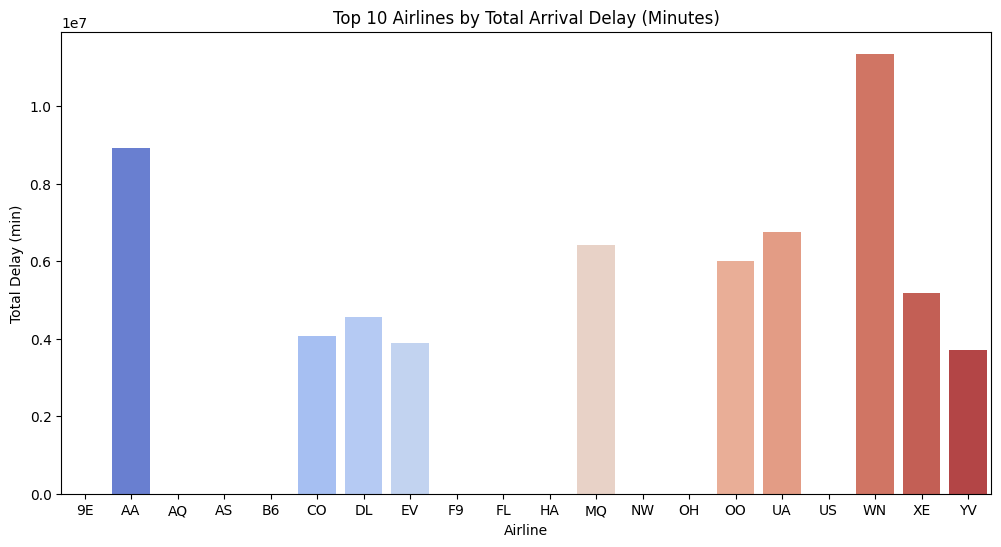

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=carrier_delay_summary.head(10), x='uniquecarrier', y='arrdelay', palette='coolwarm')
plt.title('Top 10 Airlines by Total Arrival Delay (Minutes)')
plt.xlabel('Airline')
plt.ylabel('Total Delay (min)')
plt.show()


##Compare Delay Causes by Airline

C:\Users\HP\AppData\Local\Temp\ipykernel_24980\3221242508.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_cause = subset.groupby('uniquecarrier')[['carrierdelay','weatherdelay','nasdelay','lateaircraftdelay']].sum()


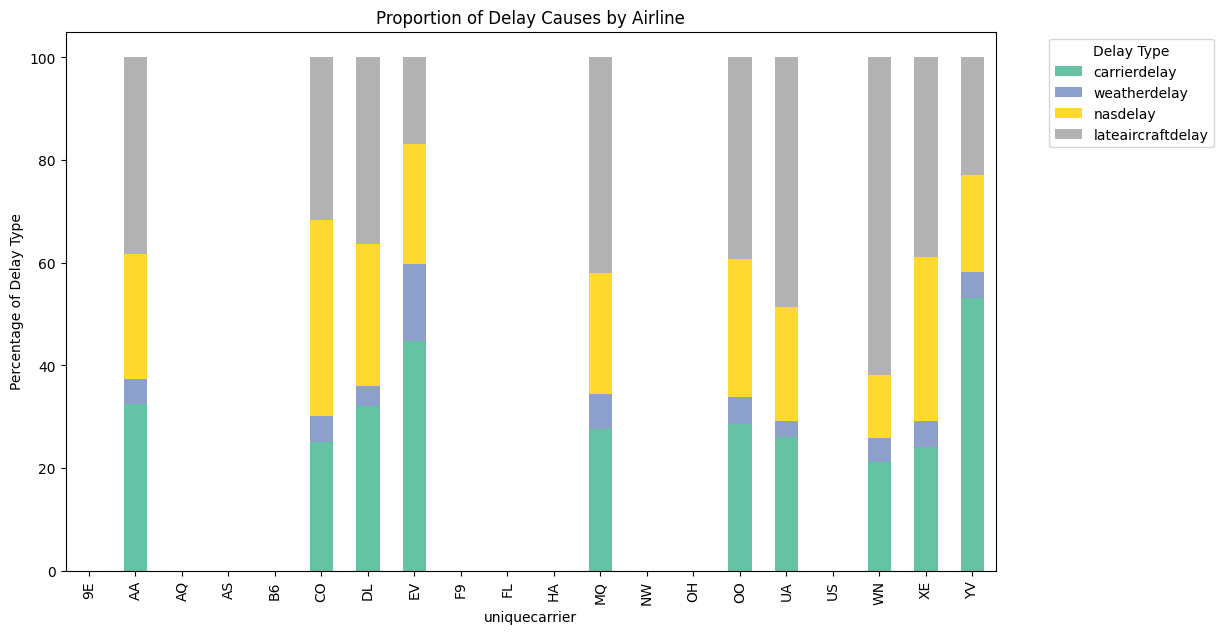

In [12]:
top_airlines = carrier_delay_summary.head(10)['uniquecarrier']

subset = df[df['uniquecarrier'].isin(top_airlines)]
delay_by_cause = subset.groupby('uniquecarrier')[['carrierdelay','weatherdelay','nasdelay','lateaircraftdelay']].sum()

delay_by_cause_percent = delay_by_cause.div(delay_by_cause.sum(axis=1), axis=0) * 100

delay_by_cause_percent.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Set2')
plt.title('Proportion of Delay Causes by Airline')
plt.ylabel('Percentage of Delay Type')
plt.legend(title='Delay Type', bbox_to_anchor=(1.05, 1))
plt.show()

##Average Delay per Airline

C:\Users\HP\AppData\Local\Temp\ipykernel_24980\4052973751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_by_airline = df.groupby('uniquecarrier')['arrdelay'].mean().sort_values(ascending=False).reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_24980\4052973751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay_by_airline.head(10), x='uniquecarrier', y='arrdelay', palette='viridis')


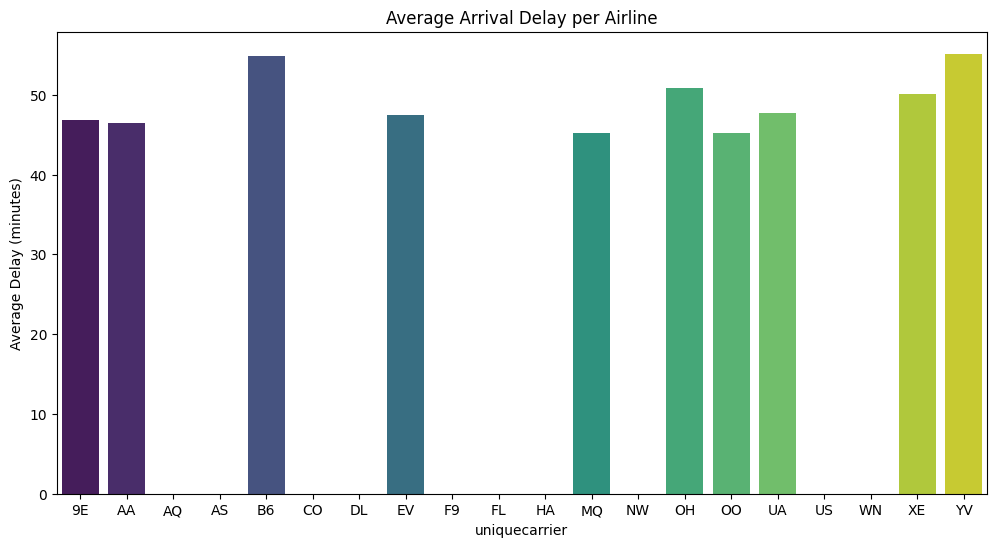

In [14]:
avg_delay_by_airline = df.groupby('uniquecarrier')['arrdelay'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_delay_by_airline.head(10), x='uniquecarrier', y='arrdelay', palette='viridis')
plt.title('Average Arrival Delay per Airline')
plt.ylabel('Average Delay (minutes)')
plt.show()


##Weather vs Carrier Delay Correlation

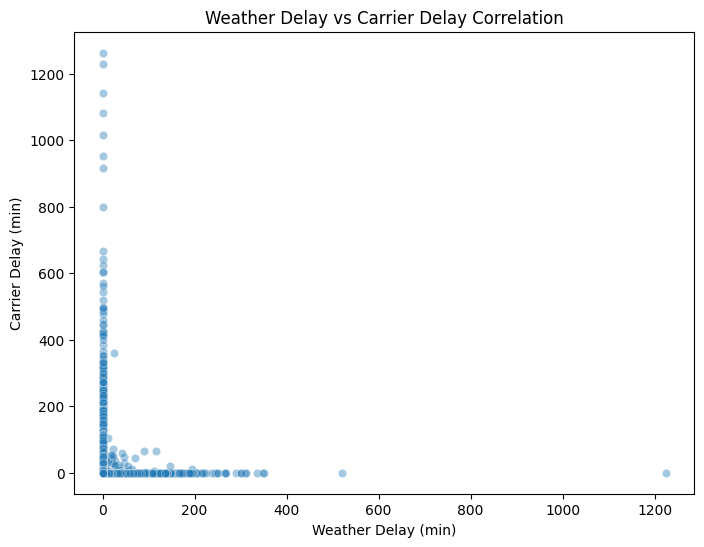

,weatherdelay,carrierdelay,nasdelay,arrdelay
weatherdelay,1.000000,-0.040352,0.023727,0.277861
carrierdelay,-0.040352,1.000000,-0.046690,0.545228
nasdelay,0.023727,-0.046690,1.000000,0.451026
arrdelay,0.277861,0.545228,0.451026,1.000000


In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(20000), x='weatherdelay', y='carrierdelay', alpha=0.4)
plt.title('Weather Delay vs Carrier Delay Correlation')
plt.xlabel('Weather Delay (min)')
plt.ylabel('Carrier Delay (min)')
plt.show()

df[['weatherdelay','carrierdelay','nasdelay','arrdelay']].corr()


##Delay by Airport (Origin)

C:\Users\HP\AppData\Local\Temp\ipykernel_24980\437311471.py:43: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\HP\anaconda3\envs\autoflow\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


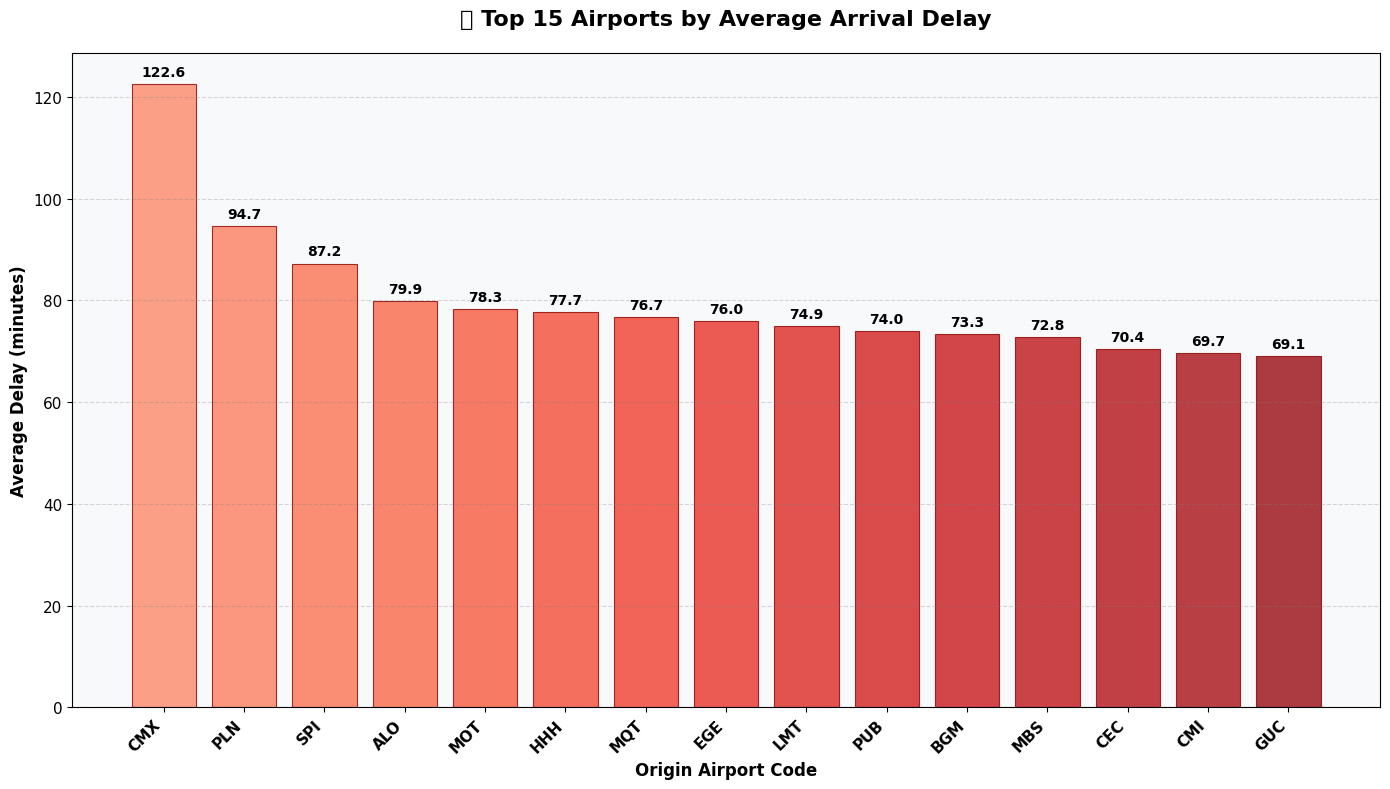

In [28]:

airport_delays = (
    df.groupby('origin', observed=True)['arrdelay']  # Add observed=True to avoid warning
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Create a more professional visualization
plt.figure(figsize=(14, 8))

# Create the bar plot with proper styling
bars = plt.bar(
    airport_delays['origin'], 
    airport_delays['arrdelay'], 
    color=plt.cm.Reds(np.linspace(0.4, 0.9, len(airport_delays))),  # Gradient red colors
    edgecolor='darkred',    # Add borders to bars
    linewidth=0.8,
    alpha=0.8
)

# Enhance the plot styling
plt.title('🛫 Top 15 Airports by Average Arrival Delay', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Delay (minutes)', fontsize=12, fontweight='bold')
plt.xlabel('Origin Airport Code', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11, fontweight='bold')
plt.yticks(fontsize=11)

# Add value labels on top of each bar
for i, (bar, value) in enumerate(zip(bars, airport_delays['arrdelay'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add a grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--', color='gray')

# Set background color
plt.gca().set_facecolor('#f8f9fa')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

##Delay Pattern by Time of Day

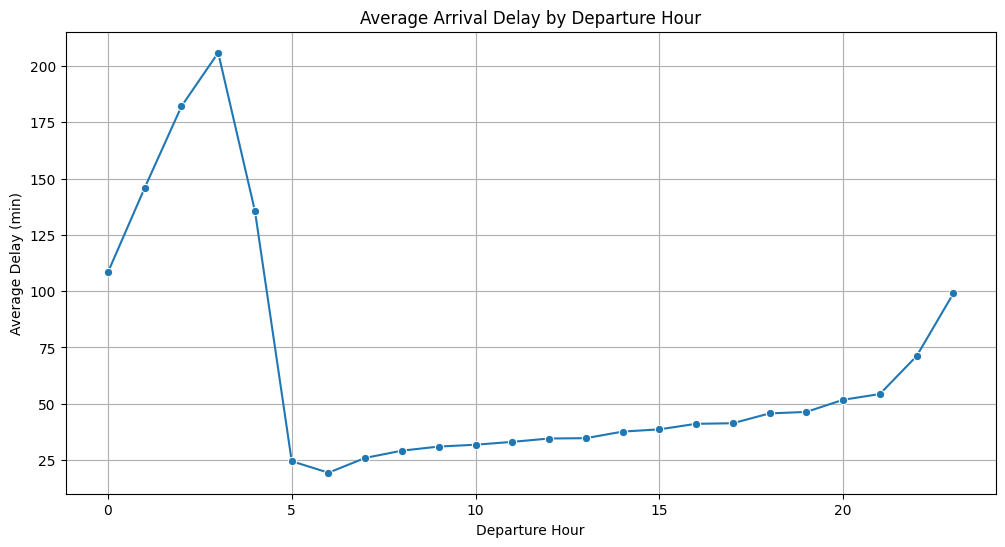

In [29]:
hourly_delay = df.groupby('dep_hour')['arrdelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_delay, x='dep_hour', y='arrdelay', marker='o')
plt.title('Average Arrival Delay by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay (min)')
plt.grid(True)
plt.show()


##Delay by Month (Seasonal Analysis)

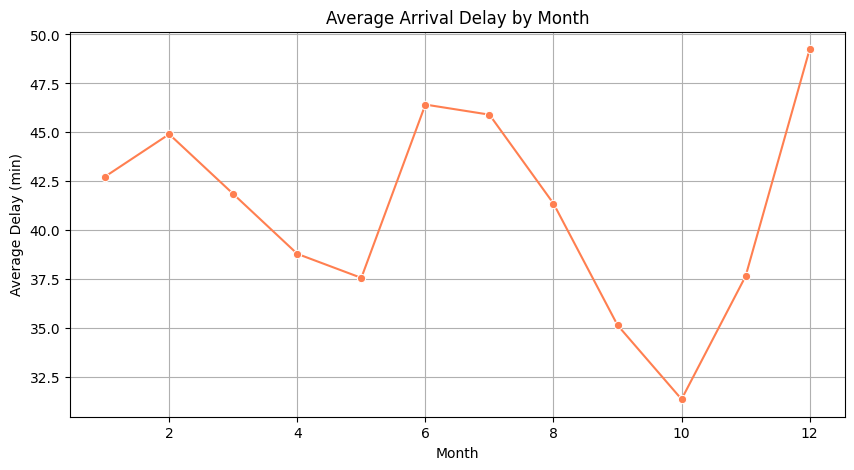

In [30]:
monthly_delay = df.groupby('month')['arrdelay'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_delay, x='month', y='arrdelay', marker='o', color='coral')
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (min)')
plt.grid(True)
plt.show()
